In [1]:
import pandas as pd
import numpy as np
from scipy import sparse
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn
import sklearn
from sklearn.model_selection import train_test_split

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

머신 러닝에서는, 

데이터가 어떤 형태의 feature로 구현되어 있는가(continuous / categorical (discrete))보다는

'데이터를 어떻게 표현하는가'가 모델 성능에 영향을 미친다. 예컨대 2, 3장에서 본 scale 조정이 모델 성능에 긍정적인 영향을 미친다.

또는 feature의 상호작용 값(곱셉)이나 제곱값, 일반적인 다항식을 특성으로 넣어서 성능 향상도 가능하다.

#### 이처럼 특정 애플리케이션에 가장 적합한 데이터 표현을 찾는 걸 feature engineering이라고 한다.

올바른 데이터 표현은 적절한 hyperparameter를 선택하는 것보다 성능에 더 큰 영향을 미친다.



In [2]:
import os
data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "adult.data"),header=None,
                  index_col = False, names = ['age','workclass','fnlwgt','education','education_num',
                                             'marital_status','occupation','relationship','race','gender',
                                             'capital_gain','capital_loss','hours_per_week','native_country',
                                             'income'])
data = data[['age','workclass','education','gender','hours_per_week','occupation','income']]
data.head()

,age,workclass,education,gender,hours_per_week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


1. column에 어떤 범주형 데이터(categorical)가 있는지 확인한다.

사용자로부터 입력받은 값일 경우 오탈자 / 범주 밖의 값이 있을 수 있다. value_counts()로 확인

2. get_dummies 함수로 categorical date encoding

연속형 특성(age, hours_per_week)은 그대로, categorical feature는 값마다 새로운 feature로 확장되었음.

In [4]:
print('original features: {}'.format(data.columns),'\n')
data_dummies = pd.get_dummies(data)
print('get_dummies features: \n', list(data_dummies.columns))

original features: Index(['age', 'workclass', 'education', 'gender', 'hours_per_week',
       'occupation', 'income'],
      dtype='object') 

get_dummies features: 
 ['age', 'hours_per_week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleane

data_dummmies의 values로 Numpy 배열 변환이 가능함. 이걸로 모델 학습.

모델 학습시키기 이전, 데이터로부터 '타겟값'을 분리해야 함. 이 경우 income_ <=50k, income_ >50k.

출력값 또는 출력값에서 유도된 변수를 feature에 넣지 않도록 유의.

여기서는 특성을 포함한, age부터 occupation_ Transport-moving까지를 쓸 거다.

In [7]:
features = data_dummies.loc[:,'age':'occupation_ Transport-moving']
#Numpy 배열 추출
X = features.values
y = data_dummies['income_ >50K'].values

훈련 데이터와 테스트 데이터의 feature 속성 / 이름이 다를 경우 모델 예측성능이 좋지 않다.

특히 get_dummies로 범주화한 데이터의 경우 column이름이나 위치가 달라질 수 있다.

따라서 train / test 데이터가 모두 포함된 dataframe을 train / test로 나누는 방식이나

train, test 데이터를 각각 써야 한다면 면밀히 비교해야 한다.

pandas의 get_dummies 함수는, 숫자는 전부 연속형이라 판단해 feature를 만들지 않는다.

어떤 column이 categorical 변수인지를 지정할 수 있는 게 OneHotEncoder

또는 dataframe에 있는 숫자를 문자열로 바꾼 다음 get_dummies를 써도 된다.

# 구간 분할, 이산화, 선형 모델과 트리 모델 

폭넓게 쓰이는 두 알고리즘인 선형 / 트리 기반 알고리즘은

feature의 표현 방식이 데이터에 미치는 영향이 매우 다르다.

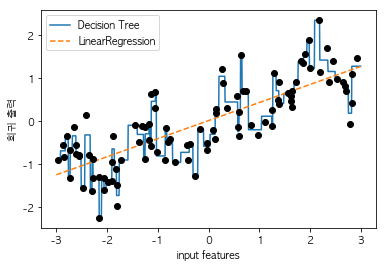

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint = False).reshape(-1,1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label = 'Decision Tree')

reg =  LinearRegression().fit(X,y)
plt.plot(line, reg.predict(line), '--',label = 'LinearRegression')

plt.plot(X[:,0], y, 'o', c = 'k')
plt.ylabel('회귀 출력')
plt.xlabel('input features')
plt.legend(loc = 'best')

선형 모델은, 선형 관계로만 모델링하기 때문에 특성이 하나일 땐 직선으로 나타난다.

결정 트리는 이 데이터로 훨씬 복잡한 모델을 만들 수 있음. 하지만, 데이터의 표현 형태에 따라 크게 달라진다는 문제점이 있다.

**연속형 데이터에 강력한 선형 모델을 만드는 방법 중 하나는, 하나의 feature를 여러 feature로 나누는 구간 분할이다**

In [10]:
bins = np.linspace(-3,3, 11) # -3과 3 사이에 같은 간격으로 10개의 구간을 정의. 11개의 분기점을 설정해야 10개의 구간이 생긴다
print('bins : {}'.format(bins))

bins : [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


그 다음, 각 데이터 포인트가 어느 구간에 속하는지를 기록한다.

In [11]:
which_bin = np.digitize(X, bins = bins)
print('\n 데이터 \n', X[:5])
print('\n 데이터가 속한 구간\n', which_bin[:5])


 데이터 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

 데이터가 속한 구간
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


따라서, 이 연속 특성을 각 데이터 포인트가 어느 구간에 속하는지를 categorical feature로 변환할 수 있다.

In [12]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False)

# fit함수는 which_bin에 나타난 유일한 값을 찾는다.
encoder.fit(which_bin)

X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [13]:
print(X_binned.shape)

# 구간을 10개로 정의했기에, 변환된 데이터셋은 10개의 특성으로 구현된다.
# cf
# pd.qcut 함수도 있다.

(100, 10)


Text(0.5, 0, 'input feature')

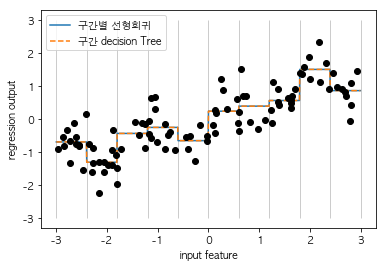

In [14]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned),label = '구간별 선형회귀')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)

plt.plot(line, reg.predict(line_binned),'--',label = '구간 decision Tree')

plt.plot(X[:,0],y, 'o',c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha =.2)
plt.legend(loc = 'best')
plt.ylabel('regression output')
plt.xlabel('input feature')

트리의 예측 회귀선과 선형회귀의 예측선이 동일해졌다. 선형 모델은 이런 변환으로 예측력을 상승시키는 효과를 볼 수 있다.

선형회귀는 이전보다 유연해졌다는 효과가 있지만, 트리 모델의 경우 예측력이 오히려 떨어졌다.

**트리 모델은 애초에 데이터를 자유롭게 나눠 학습할 수 있기에, 특성의 값을 구간으로 나누는 것이 별 도움이 되지 않는다.**

다르게 생각하면, 결정 트리는 '데이터셋에서 예측을 위한 가장 좋은 구간'을 학습한다고 볼 수 있다.
    + 결정 트리는 한 번에 여러 특성을 살필 수 있다.
    
   ---------
일부 feature와 output의 관계가 비선형이지만

용량이 매우 크고 고차원 데이터셋이라서 선형 모델을 사용해야 하면 

**구간 분할이 성능 향상에 도움이 된다.**

# 상호작용과 다항식


원본 데이터에 interaction / polynormial을 추가하는 것도 도움이 된다. 이런 종류는 통계적 모델링에도 사용되지만 머신러닝 학습에도 사용 가능

In [16]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

# hstack 명령은 행의 수가 같은 두 개 이상의 배열을 옆으로 연결하여 열의 수가 더 많은 배열을 만든다. 연결할 배열은 하나의 리스트에 담아야 한다.
# concatenate로 column을 붙인 것과 동일한 효과

(100, 11)


방금 전의 모델은 wave dataset의 각 구간별 '상수값'을 학습했다.

하지만 선형 모델은 '기울기'도 학습이 가능함. 선형 모델에 기울기를 추가하는 방법은

구간으로 분할된 데이터에 원래 특성을 추가하는 것. (X_combined)을 만든 것

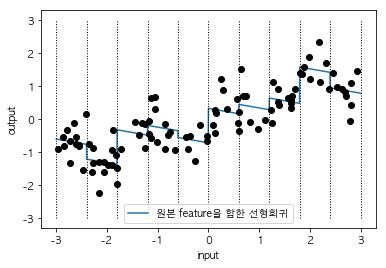

In [20]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label = '원본 feature을 합한 선형회귀')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c = 'k', linewidth = 1)
plt.legend(loc='best')
plt.ylabel('output')
plt.xlabel('input')
plt.plot(X[:,0],y, 'o',c='k')

각 구간의 절편, 기울기를 학습한 모델. 학습된 기울기는 음수이고, 모든 구간에 걸쳐 동일한 기울기를 보여준다.

(X축 특성이 하나뿐이라, 기울기도 한 개)

-> 모두 동일한 기울기인 건 그다지 좋아보이지 않는다. 각 구간별로 기울기가 달라야 예측에 더 나을 것.

이걸 위해서 -> 데이터가 있는 구간과 x축 사이의 interaction 항을 추가할 수 있다. (구간 특성 * 원본 특성)

In [23]:
X_product = np.hstack([X_binned, X*X_binned])
print(X_product.shape)

# 구간 안에서는 one_hot의 결과인 1이 아니라 원본 feature. 다른 곳에서는 0

(100, 20)


Text(0.5, 0, 'input')

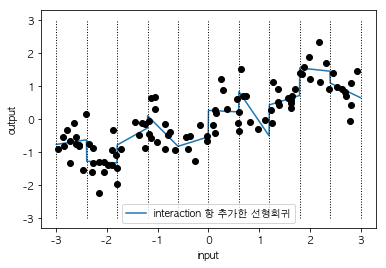

In [29]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label = 'interaction 항 추가한 선형회귀')

for bin in bins:
    plt.plot([bin,bin], [-3,3], ':',c='k',linewidth =1)
    
plt.plot(X[:,0],y,'o',c='k')
plt.legend(loc='best')
plt.ylabel('output')
plt.xlabel('input')

-------

구간 나누기는 continuous feature을 확장하는 방법 중 하나.

원본 특성의 다항식을 추가하는 방법 (제곱, 세제곱 등)

In [30]:
from sklearn.preprocessing import PolynomialFeatures

# x**10까지의 고차항을 추가한다
# include_bias = True는 절편을 위해 값이 1인 특성을 추가하는 것

poly = PolynomialFeatures(degree = 10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [31]:
print('X_poly.shape: {}'.format(X_poly.shape))

X_poly.shape: (100, 10)


In [32]:
print("X 원소: {}".format(X[:5]))
print('X_poly 원소: {}'.format(X_poly[:5]))

X 원소: [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly 원소: [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [33]:
print('feature 이름: {}'.format(poly.get_feature_names()))

feature 이름: ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


다항식 특성을 선형 회귀에 같이 사용하면, 전형적인 다항 회귀(polynomial regression) 모델이 된다.

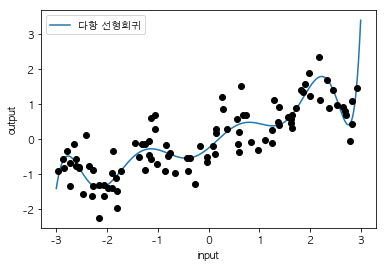

In [34]:
reg = LinearRegression().fit(X_poly,y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly),label='다항 선형회귀')
plt.plot(X[:,0],y, 'o',c = 'k')
plt.ylabel('output')
plt.xlabel('input')
plt.legend(loc ='best')

다항식 특성은 이처럼 부드러운 곡선을 만들어내지만, 데이터 부족한 영역에서는 너무 민감하게 동작한다 (맨 우측의 데이터..)

비교를 위해, 아무 변화도 거치지 않은 원본 데이터에 커널SVM 모델을 학습시켜보면

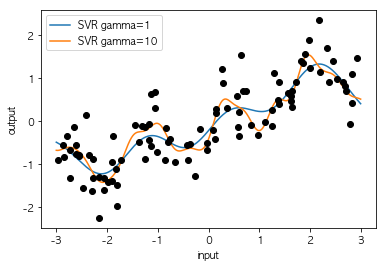

In [36]:
from sklearn.svm import SVR

for gamma in [1,10]:
    svr = SVR(gamma = gamma).fit(X,y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
    
plt.plot(X[:,0],y, 'o',c='k')
plt.ylabel('output')
plt.xlabel('input')
plt.legend(loc='best')

더 복잡한 모델인 커널svm으로 특성 데이터 변경 없이 다항회귀와 비슷한 복잡도를 가진 예측을 만들어낼 수 있다.

## 보스턴 주택가격 데이터셋 

feature가 어떻게 구성되었는지, 다항식 feature가 얼마나 도움이 되는지 확인하기

In [38]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
boston.data, boston.target, random_state=0)

# scale
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

차수를 2로 해서 다항식 특성 뽑기

In [39]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print('X_train.shape: {}'.format(X_train.shape))
print("X_train_poly.shape; {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape; (379, 105)


In [40]:
print('feature name:\n',poly.get_feature_names())
# 첫 번째 특성이 상수항. x12까지는 원본 항, 그 이후부터는 제곱항 & 다른 항과의 조합.

feature name:
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


## 상호작용 특성이 있는 데이터 / 없는 데이터의 Ridge 비교

In [42]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print('상호작용 X 점수: {}'.format(ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train)
print('상호작용 O 점수: {}'.format(ridge.score(X_test_poly, y_test)))

상호작용 X 점수: 0.5768611445540035
상호작용 O 점수: 0.7411219642018829


In [43]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state = 0).fit(X_train_scaled, y_train)
print('상호작용 X 점수: {}'.format(rf.score(X_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators=100, random_state = 0).fit(X_train_poly, y_train)
print('상호작용 O 점수: {}'.format(rf.score(X_test_poly, y_test)))

상호작용 X 점수: 0.7862053027925996
상호작용 O 점수: 0.7610776148859826


랜덤포레스트는 interaction 항을 추가하지 않아도 성능이 좋으며, 오히려 추가하면 성능이 떨어지는 효과.

- 제곱항이나 세제곱항, log, exp, sin같은 수학 함수를 적용해 특성을 변환하는 것도 선형 회귀모델에서는 유용하다. 
- 트리 기반 모델은 'feature 순서'만 영향을 미치는 반면, 선형 모델이나 신경망 모델은 feature의 scale, 분포가 성능에 매우 중요하다.
    (트리 기반 모델의 max_feature 매개변수는 각 분기에서 사용될 feature의 개수를 제한. 따라서 특성의 나열 순서가 결과에 영향을 줄 수 있다)

feature와 target 사이에 non-linear 요건이 있으면, 선형 회귀 모델을 만드는 게 매우 어렵다. log나 exp가 데이터 스케일을 변경해 선형모델, 신경망 성능을 올리는 데 기여한다. 

sin / cos의 경우는 '주기적인 패턴'이 나타나는 데이터를 다룰 때 편리하다.


#### 대부분의 모델은 각 feature(regression일 경우는 target값도)가 정규분포와 비슷할 때 최고의 성능을 낸다. 즉 feature의 히스토그램이 종 모양일 때.

log, exp는 이런 모양을 만드는 편리한 방법이라 예측성능을 향상시키는 것.

이런 변형이 도움 되는 전형적인 경우는 '정수 count 데이터'를 다룰 때. '사용자가 얼마나 자주 로그인하는가?' 같은 특성.

* 대개 이런 특성은 음수가 없고, 통계 패턴을 따르는 경우가 많다.

아래 데이터는 실제 데이터 속성과 비슷한 카운트 데이터를 사용한 것

In [50]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(3)

X = rnd.poisson(10*np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10,0])

[75 96 26 10 26 14 13 20 92  7]


In [51]:
print('feature 출연 횟수: {}'.format(np.bincount(X[:,0])))
# 개별 숫자는 패턴이 안 보이지만, bincount로 각 값이 나타나는 횟수를 세면 분포가 드러난다. 1이 26, 2가 40...

feature 출연 횟수: [26 40 55 51 65 58 45 62 43 35 42 33 39 27 23 24 25 20 21 25 22 15 11 12
 10  9  8  7  8 10  5  7  4  7  3  6  4  5  6  4  3  3  1  3  6  1  3  3
  3  2  3  4  2  0  3  3  0  2  0  1  0  1  0  3  2  0  1  0  2  0  1  0
  1  3  0  2  2  0  0  0  0  0  2  1  1  1  0  0  1  0  0  0  1  0  0  0
  1  0  0  0  0  0  0  0  1  0  0  0  1  1  1  0  0  0  0  0  0  0  1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'value')

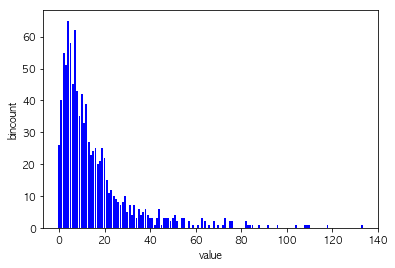

In [53]:
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)), bins, color ='blue')
plt.ylabel('bincount')
plt.xlabel('value')

X[:,1]이나 X[:,2] 도 비슷한 형태로 나타남. 실제로 작은 수치가 많고 큰 수치가 얼마 없는 이런 형태의 데이터를 자주 볼 수 있지만,

일반적인 선형모델은 이런 데이터를 잘 처리하지 못한다.

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
score = Ridge().fit(X_train,y_train).score(X_test, y_test)
print(score)
# R^2 점수가 높지 않다는 건, X와 y의 관계 모델링이 정확하지는 않다는 소리다.
# 단 이런 경우 log scale로 변환하면 도움이 된다.

0.6089836113663152


데이터를 그냥 로그화하면 0을 바꿀 수 없으므로, log(X+1) 형태를 사용한다.

Text(0.5, 0, 'value')

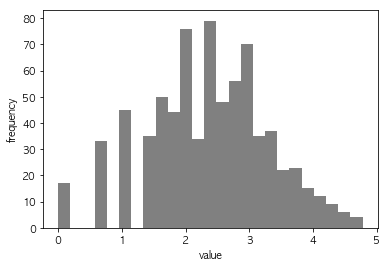

In [56]:
X_train_log = np.log(X_train+1)
X_test_log = np.log(X_test+1)

plt.hist(X_train_log[:,0],bins = 25, color = 'gray')
plt.ylabel('frequency')
plt.xlabel('value')

# 이전보다는 정규분포에 가까워진 걸 확인할 수 있다.

In [57]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print(score)

# 결과가 이전보다 나아진 걸 볼 수 있다.

0.8607125034575352


모든 특성이 같은 분포를 띠고 있어서 로그변환만으로도 크게 score값이 올랐지만,

실제로 이런 경우는 드물고, 대개는 일부 특성만 변환하거나 특성마다 다르게 변환해야 하기도 한다.

가끔은, 회귀의 경우 target값인 y를 변환하는 게 도움이 될 때도 있다. 

* 카운트 (주문 횟수)를 예측하려는 경우가 전형적인 예시로, log(y+1)을 사용해 변환하면 도움이 된다.

구간 분할, 제곱항 및 interaction 항 추가는 데이터가 주어진 상황에서 모델의 성능에 큰 영향을 줄 수 있다.
* 선형모델, 나이브 베이즈 모델 같은 덜 복잡한 모델의 경우에 한해서.

트리 기반 모델은 스스로 중요한 interaction을 찾아낼 수 있고, 대부분의 경우 데이터 변환을 명시적으로 할 필요가 없다.

SVM, KNN, Neural Net 모델은 이따금 구간분할, 다항식이나 상호작용 변수가 도움이 될 수는 있으나, 효과가 뚜렷하다고 보긴 힘들다.

# 특성 자동 선택

새로운 특성을 만드는 방법이 많기에, 데이터 차원이 원본 이상으로 커지는 경우는 흔하다.

하지만 feature가 추가되면 모델이 복잡해지고, overfit 가능성도 높아진다. 

따라서 새로운 항을 추가할 때는 '가장 유용한 특성만 선택'하고 나머지는 버려서 feature 수를 낮추는 게 좋다.

-> 어떤 특성이 좋은지 어떻게 알 수 있나?

**일변량 통계(univariate statistic), 모델 기반 선택(model-based selection), 반복적 선택(iterative selection)**

모두 지도학습이므로 target값이 있어야 '최적값'을 찾을 수 있으며,

데이터를 훈련 / 테스트 데이터로 나눈 다음 훈련 데이터만 feature selection에 사용해야 한다.

## 일변량 통계

각 특성이 독립적인지 아닌지를 평가. 즉 다른 feature와 연관성이 높은 건 선택하지 않는다.

계산이 빠르고 평가를 위한 모델을 만들 필요가 없다. 적용하려는 모델에 상관없이 사용할 수 있다.



In [67]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile

cancer = load_breast_cancer()

# 고정된 난수값
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data),50))

# 데이터에 노이즈 추가.
# 처음 30개는 원본, 나머지는 노이즈
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state =0, test_size = .5)

# f_classif(기본값), SelectPercentile을 사용해 특성의 50%를 선택한다.
select = SelectPercentile(percentile=50)
select.fit(X_train,y_train)

# 훈련 세트에 적용
X_train_select = select.transform(X_train)

print('X_train.shape: {}'.format(X_train.shape))
print('X_train_select.shape: {}'.format(X_train_select.shape))

X_train.shape: (284, 80)
X_train_select.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'feature number')

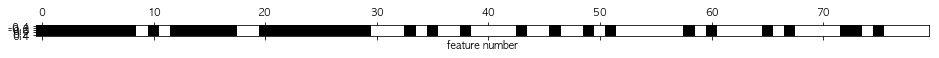

In [68]:
mask = select.get_support()
print(mask)
# 어떤 특성이 선택되었는지를 확인할 수 있다.
plt.matshow(mask.reshape(1,-1),cmap ='gray_r')
plt.xlabel('feature number')

선택된 특성은 대부분 '원본 feature'. 노이즈 특성이 거의 모두 제거된 게 특징이다.

그렇지만 원본 특성이 완전히 복구된 건 아니다. 전체 특성을 이용했을 때 / 선택된 특성만 사용했을 때의 로지스틱 성능 비교하기

In [70]:
from sklearn.linear_model import LogisticRegression

# 테스트 데이터 변환
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print('전체 특성을 사용한 점수: {}'.format(lr.score(X_test, y_test)))
lr.fit(X_train_select, y_train)
print('선택 특성만 사용한 점수: {}'.format(lr.score(X_test_selected, y_test)))


전체 특성을 사용한 점수: 0.9298245614035088
선택 특성만 사용한 점수: 0.9403508771929825


/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


실제 데이터의 결과는 엇갈리는 경우도 많다. 

하지만 너무 많은 feature 때문에 모델을 만들기가 현실적으로 어렵다면, 일변량 분석으로 특성 선택 시 도움이 된다.

아니면, 대부분의 특성이 딱히 도움이 안 되는 것 같은 경우에도 사용한다.

## 모델 기반 feature selection 

In [72]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),threshold='median')

지도 학습 모델로 계산된 중요도가 '지정한 임계치보다 큰' 모든 특성을 선택하는 함수.

지금의 경우 일변량 분석으로 선택한 특성과 결과를 비교하기 위해 'median'값 사용. (절반 정도의 특성이 선택될 수 있게)

트리 100개로 만든 랜덤포레스트 모델... 복잡한 모델이고 일변량 분석보다 강력한 방법이다.

In [73]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print('X_train.shape: {}'.format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5, 0, 'feature number')

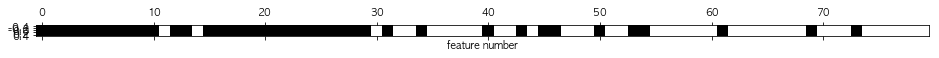

In [74]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel('feature number')

# 이 경우 원본 특성 2개를 제외한 모든 원본특성이 선택되었음

In [75]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print('test score: {}'.format(score))

test score: 0.9508771929824561


/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 반복적 특성 선택

일변량 분석에서는 모델을 사용하지 않고, 모델 기반 선택은 '하나의 모델을 사용해 특성을 선택'함.

반복적 특성 선택의 경우, 특성의 수가 각기 다른 모델을 만든 다음

1. 특성이 없는 상태에서 시작해 종료 조건에 도달할 때까지 하나씩 특성을 추가

2. 반대로, 모든 특성을 갖고 시작해 종료 조건까지 하나씩 특성을 제거

대부분의 모델은 score값 (R^2)이 커지는 방향으로 나아간다.

#### 재귀적 특성 제거.(RFE)

2번 방법을 채용. 미리 정의한 특성 개수가 남을 때까지 전체 특성에서 하나씩 제거한다.

이 경우, 특성 선택에 사용할 모델은 '중요도'를 결정하는 방법을 제공해야 한다.

랜덤포레스트 사용시

Text(0.5, 0, 'feature number')

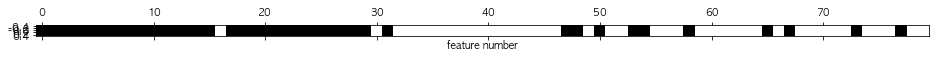

In [77]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)

select.fit(X_train, y_train)

mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel('feature number')

일변량 분석 / 모델 기반 선택보다 특성 선택이 나아졌지만, 여전히 특성 한 개를 놓침.

랜덤 포레스트 모델은 특성이 누락될 때마다 다시 학습하므로 40번 실행됨.

그렇기에 이 코드는 모델 기반 선택보다 오래 걸린다.

In [78]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print('test score: {}'.format(score))

test score: 0.9508771929824561


/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


어떤 입력값을 넣을지 확신이 안 설때 도움이 될 수 있음. 예측 속도를 높이거나 해석에 쉬운 모델을 만드는 데 필요한 만큼 특성의 수를 줄일 수도 있다.

다만 실전에서는 특성 선택이 큰 성능향상을 끌어내지는 못하는 편임.

## 도메인 지식 활용 


특성이 추가된다고 해서 반드시 그 특성을 머신러닝이 사용하는 건 아니다.

전문가 지식을 사용하는 전형적 사례 - 집앞의 자전거가 대여 가능한지 예측하기

In [79]:
citibike = mglearn.datasets.load_citibike()

print('citibike data: {}'.format(citibike.head()))

citibike data: starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, '대여횟수')

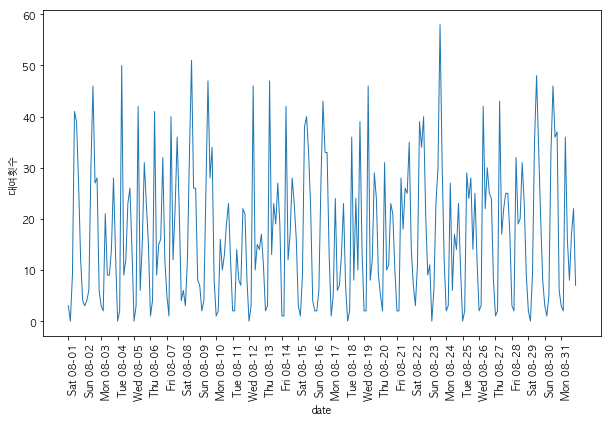

In [84]:
plt.figure(figsize=(10,6))

xticks = pd.date_range(start = citibike.index.min(), end = citibike.index.max(), freq = 'D')
week = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
xticks_name = [week[int(w)]+d for w,d in zip(xticks.strftime("%w"),xticks.strftime(" %m-%d"))]
plt.xticks(xticks,xticks_name, rotation=90, ha='left')
plt.plot(citibike, linewidth=1)
plt.xlabel('date')
plt.ylabel('대여횟수')

24시간 간격으로 낮,밤 구분이 가능하며, 주중과 주말의 패턴도 구분이 가능할 듯 보인다.

이와 같은 시계열 데이터형 예측 작업 -> 과거 데이터에서 학습해 미래를 예측하는 데 쓰인다.

train / test 구분에서 '어떤 날짜까지의 모든 데이터'를 훈련 셋으로, 그 날짜 이후의 모든 데이터를 테스트셋으로 쓴다.

이전 데이터를 전부 입력하고 내일 어떻게 될지를 예측하는 방식은 시계열 예측에서 많이 쓰인다.

In [85]:
# target값 추출 (대여 횟수)
y = citibike.values

# Posix 시간을 10**9로 나누어 변환하기
X = citibike.index.astype('int64').values.reshape(-1,1) // 10**9

In [87]:
# 23일 치 184개 데이터를 훈련 세트로, 남은 8일 치 64개 데이터를 테스트 셋으로 활용한다
n_train = 184

def eval_on_features(features, target, regressor):
    # train / test 분류
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    
    regressor.fit(X_train, y_train)
    print('test set R^2: {}'.format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10,3))
    
    plt.xticks(range(0,len(X),8), xticks_name, rotation=90, ha='left')
    plt.plot(range(n_train),y_train, label='train')
    plt.plot(range(n_train, len(y_test)+n_train),y_test, '-', label='test')
    plt.plot(range(n_train),y_pred_train, '--', label='train-predict')
    plt.plot(range(n_train, len(y_test)+n_train), y_pred, '--', label='test-predict')
    plt.legend(loc = (1.01,0))
    plt.xlabel('date')
    plt.ylabel('대여 횟수')

test set R^2: -0.035486463625959086


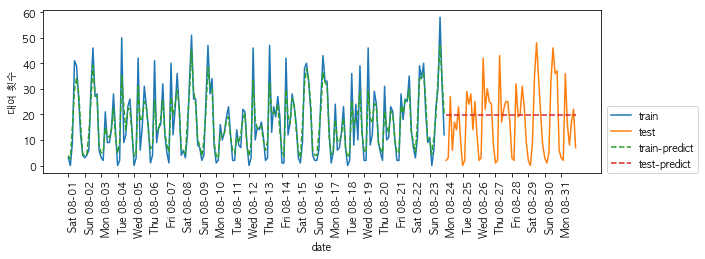

In [88]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

R^2값은 -0.03에 불과하고, 선형으로 예측결과가 나온다.

랜덤포레스트의 문제: 훈련 데이터의 특성 범위 바깥으로 나갈 수가 없다. (train에 사용한 시간대만 해석이 가능하다는 문제점)

따라서 이 모델은 테스트 세트와 가장 가까이 있는 마지막 훈련 세트 데이터의 target값을 예측으로 쓰는 문제점이 발생한다.

**이걸 해결하는 방법 by 전문가 지식** (정확히는 상식)

1. 시간과 요일이라는 두 가지 특성이 중요해 보이므로, 두 개의 특성을 추가한다.

In [91]:
X_hour.shape

(248, 1)

test set R^2: 0.5995775993305429


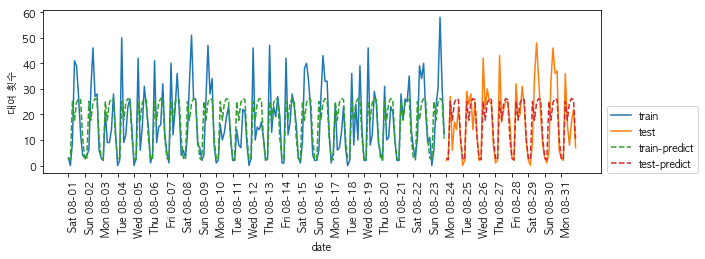

In [89]:
X_hour = citibike.index.hour.values.reshape(-1,1)
eval_on_features(X_hour, y, regressor)

test set R^2: 0.8419488587966025


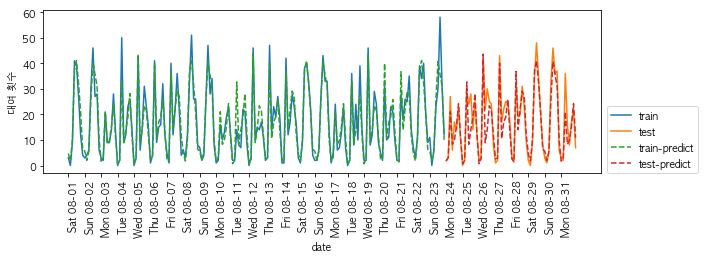

In [94]:
# 주간 패턴을 예측하지 못하므로 요일 정보를 추가한다
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1,1),
                        citibike.index.hour.values.reshape(-1,1)])
eval_on_features(X_hour_week, y, regressor)

# 결과로, 하루의 시간과 요일에 따른 주기적인 패턴을 그리고 있다.

# 이 정도 예측에는 랜덤포레스트도 필요없다. 더 간단한 모델로도 예측 가능

test set R^2: 0.13204157262163163


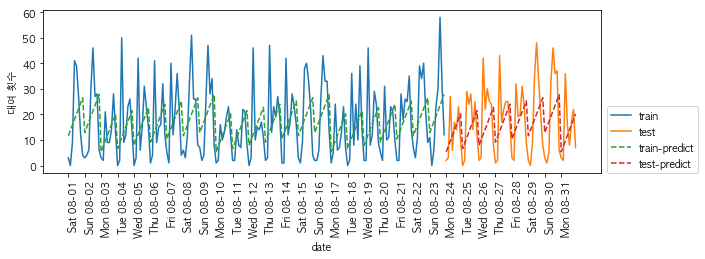

In [95]:
eval_on_features(X_hour_week, y, LinearRegression())

# 예측값이 안 좋은 이유는 요일과 시간이 정수로 인코딩되어 있어 '연속형 변수'로 해석되기 때문

In [96]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [105]:
print(citibike.index.dayofweek.unique())
print(citibike.index.hour.unique())

Int64Index([5, 6, 0, 1, 2, 3, 4], dtype='int64', name='starttime')
Int64Index([0, 3, 6, 9, 12, 15, 18, 21], dtype='int64', name='starttime')


In [100]:
X_hour_week[1]
# 요일 + 시간 array 형태 데이터.

array([5, 3])

In [101]:
X_hour_week_onehot[1]

array([0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

test set R^2: 0.6191139168658686


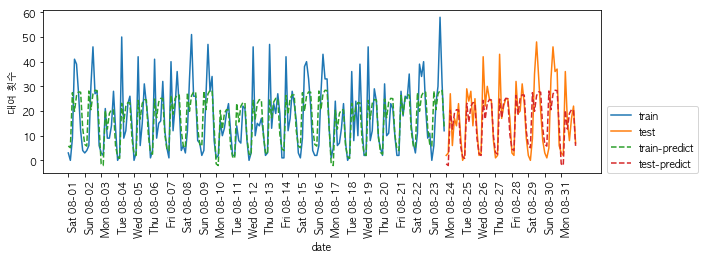

In [107]:
eval_on_features(X_hour_week_onehot, y, Ridge())

연속형 특성일 때보다 나아졌다. 요일에 대해 하나의 계수를 학습하고, 시간에 대해서도 하나의 계수를 학습한다.

즉 시간패턴이 모든 날에 걸쳐 공유된다는 뜻.

여기서 interaction 변수를 추가하면 시간+요일의 조합별 계수를 학습할 수 있다.

test set R^2: 0.8451706357968557


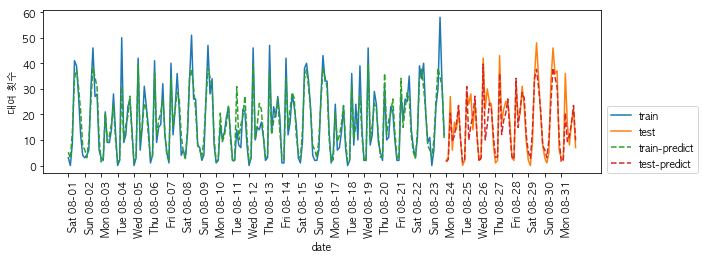

In [108]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

랜덤 포레스트와 유사한 수준으로 출력 완료.

이 모델의 가장 큰 장점은 '무엇이 학습되었는가'가 명확하다는 점. 각 날짜와 시간에 대해 하나의 계수를 학습하였음

모델이 학습한 계수를 그래프로 나타낼 수 있다.

In [112]:
hours = ["%02d:00"%i for i in range(0,24,3)]
day = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
feature = day+hours
feature

['Mon',
 'Tue',
 'Wed',
 'Thu',
 'Fri',
 'Sat',
 'Sun',
 '00:00',
 '03:00',
 '06:00',
 '09:00',
 '12:00',
 '15:00',
 '18:00',
 '21:00']

In [113]:
feature_poly = poly_transformer.get_feature_names(feature)
feature_nonzero = np.array(feature_poly)[lr.coef_ !=0]
coef_nonzero = lr.coef_[lr.coef_ !=0]

Text(0, 0.5, 'feature value')

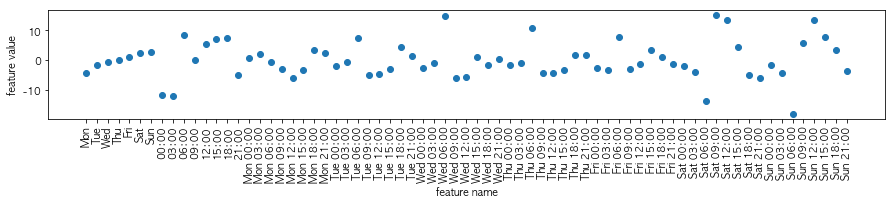

In [115]:
plt.figure(figsize=(15,2))
plt.plot(coef_nonzero,'o')
plt.xticks(np.arange(len(coef_nonzero)), feature_nonzero, rotation=90)
plt.xlabel('feature name')
plt.ylabel('feature value')